Целью проекта является изучение поведения пользователей в приложениии по реализации "ненужных вещей".    
Для исследования имеем два фрейма со следующими данными :  
mobile_sources со столбцами :  
mobile_sources  
`userId` — идентификатор пользователя    
`source` — источник, с которого пользователь установил приложение  
mobile_dataset со столбцами :  
`event.time` — время совершения  
`user.id` — идентификатор пользователя  
`event.name` — действие пользователя  
Возможные действия пользователей:  
`advert_open` — открыл карточки объявления  
`photos_show` — просмотрел фотографий в объявлении  
`tips_show` — увидел рекомендованные объявления  
`tips_click` — кликнул по рекомендованному объявлению  
`contacts_show` и `show_contacts` — посмотрел номер телефона  
`contacts_call` — позвонил по номеру из объявления  
`map` — открыл карту объявлений   
`search_1`—`search_7` — разные действия, связанные с поиском по сайту  
`favorites_add` — добавил объявление в избранное     

### Загрузим и изучим имеющиеся фреймы    
Загрузим данные и изучим их структуру    
### Предобработка данных   
1) Проверим фреймы на наличие дубликатов,пропусков и обработаем их при необходимости    
2) Исследуем тип данных во фреймах и приведем данные к нужным нам типам при необходимости  
3) Т.к. имеются события такие как 1) contacts_show и show_contacts и 2) search_1 - search_7 , которые по группам не несут относительно друг друга разницы - объединим их  
### Исследовательский анализ данных   
1) Найдем общее количество уникальных пользователей в имеющихся данных    
2) Рассмотрим имеющиеся в логах виды событий и найдем количество пользователей, которые совершали их. Подсчитаем долю   пользователей которые хоть раз совершали событие, заранее разбив наш датасет по пользователям, которые совершали целевое событие, а какие нет   
3) Построим матрицу корреляций имеется ли связь между совершением какого либо события и целевого события (просмотра контактов) 
4) Выделим людей которые совершали событие - просмотр контактов и изучим какие действия они чаще совершают  
5) Подготовим данные к последующему статистическому анализу, выделим пользователей в 2 группы :    
    а) Пользователи совершающие действия tips_show и tips_click   
    б) Пользователи совершающие только tips_show  
    и  
    а2) Пользователи пришедшие с источника Яндекс   
    б2) Пользователи пришедшие с источника Google  
### Статистический анализ данных
Проверить гипотезу: Конверсия в просмотр контактов между пользователя, совершающие действия tips_show и tips_click, другие — только tips_show - различается  
Проверим гипотезу: Конверсия в просмотр контактов между пользователя, с источником  yandex и пользователями, с источником google, различается;  
### Общий вывод  
Написать общий вывод по проведенным исследованиям и дать свою оценку в необходимсоти события показать контакты   
Подготовить презентацию по результатам исследования  

### Загрузим и изучим имеющиеся фреймы    
Загрузим данные и изучим их структуру

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import math as mth
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import rcParams
import warnings
import cmath
from scipy import stats as st
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('mobile_dataset.csv', sep = ',')
sources = pd.read_csv('mobile_soures.csv', sep = ',')

In [3]:
for df in [data, sources]:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB
None


In [4]:
for df in [data, sources]:
    print(df.isna().sum())

event.time    0
event.name    0
user.id       0
dtype: int64
userId    0
source    0
dtype: int64


In [5]:
for df in [data, sources]:
    print(df.duplicated().sum())

0
0


In [6]:
for df in [data, sources]:
    display(df.head(5))

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


### Вывод
дубликатов и пропущенных значений не обнаружено;  
нужно изменить названия столбцов в обоих датасетах;  
привести столбец с датой к формату даты;  
необходимо изменить названия столбцов в обоих датасетах 
привести столбец с датой к формату даты;  
объединить события show_contact и contact_show;  
объединить события search_1 - search_7 в одно, т.к. нам не важно что и менно искали, а сам факт поиска  

### Предобработка данных

Приведем названия столбцов к удобному для нас формату

In [7]:
data.columns = ['event_time', 'event_name', 'user_id']
data.head()

,event_time,event_name,user_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [8]:
sources.columns = ['user_id', 'source']
sources.head()

,user_id,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


Приведем столбцец event_time датасета data к формату даты

In [9]:
data['event_time'] = pd.to_datetime(data['event_time'], format='%Y.%m.%d %H:%M:%S').dt.round('1S')
data.head()

,event_time,event_name,user_id
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


Объединим события  

In [10]:
data = data.replace('contacts_show', 'show_contacts')
data = data.replace([['search_1', 'search_2', 'search_3', 'search_4', 'search_5', 'search_6', 'search_7']], 'search')
data['event_name'].value_counts()

tips_show        40055
photos_show      10012
search            6784
advert_open       6164
show_contacts     4529
map               3881
favorites_add     1417
tips_click         814
contacts_call      541
Name: event_name, dtype: int64

Объединим наши данные

In [11]:
data = data.merge(sources, on='user_id', how = 'right')
data.head()

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
3,2019-10-07 00:01:28,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:01:35,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other


### Исследовательский анализ данных

Посчитаем общее количество пользователей в логах

In [12]:
data['user_id'].nunique()

4293

В датасете имеется 4293 уникальных пользователей

In [13]:
# посчитаем конверсию пользователей в целевое событие
(data.query('event_name=="show_contacts"')['user_id'].nunique() / data['user_id'].nunique()) * 100

22.851153039832283

##### Конверсия пользователей в целевое событие - просмотр контактов составляет 23%

Разобьем данные на 2 части :  
1. Пользователи которые не соврешали целевое событие (просмотр контактов)  
2. Пользователи которые это действие совершили

In [14]:
user_list  = data.loc[data['event_name'] == 'show_contacts', 'user_id']
user_list = user_list.drop_duplicates().reset_index(drop = True)
user_list_contacts = user_list.to_list()
len(user_list_contacts)

981

Количество уникальных пользователей которые просматривали контакты - 981 (около 23% всех пользователей)

In [15]:
# выбираем все стрроки из фрейма для пользователей, которые просматривали контакты хоть раз
data_show =  data.query('user_id in @user_list_contacts')


In [16]:
data_not_show =  data.query('user_id not in @user_list_contacts')


In [17]:
data_not_show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47000 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  47000 non-null  datetime64[ns]
 1   event_name  47000 non-null  object        
 2   user_id     47000 non-null  object        
 3   source      47000 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


In [18]:
data_show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27197 entries, 121 to 74191
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  27197 non-null  datetime64[ns]
 1   event_name  27197 non-null  object        
 2   user_id     27197 non-null  object        
 3   source      27197 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.0+ MB


In [19]:
data_show['event_name'].value_counts()

tips_show        12768
show_contacts     4529
photos_show       3828
search            2084
advert_open       1589
map               1101
contacts_call      541
favorites_add      424
tips_click         333
Name: event_name, dtype: int64

In [20]:
data_not_show['event_name'].value_counts()

tips_show        27287
photos_show       6184
search            4700
advert_open       4575
map               2780
favorites_add      993
tips_click         481
Name: event_name, dtype: int64

Просмотр контактов по частоте занимает 2 место у пользователей(после показа рекомендованных) которые вообще их открывали, при этом звонок по полученному контакту занимает 3 место с конца. Посмотрим отношение звонков к количество раз просмотренных контактов.


In [21]:
show = data_show.loc[data_show['event_name'] == 'show_contacts','user_id'].count()
show

4529

In [22]:
calls = data_show.loc[data_show['event_name'] == 'contacts_call','user_id'].count()
calls

541

In [23]:
perc_calls_show = calls / show * 100
perc_calls_to_all = calls / data_show['user_id'].count() * 100
perc_calls_show =np.format_float_positional(perc_calls_show, precision=2)
perc_calls_to_all =np.format_float_positional(perc_calls_to_all, precision=2)
perc_calls_show

'11.95'

In [24]:
for_pie_show= data_show.groupby(['event_name'], as_index = False)['user_id'].count().sort_values('user_id', ascending = False)
for_pie_not_show= data_not_show.groupby(['event_name'], as_index = False)['user_id'].count().sort_values('user_id', ascending = False)

Text(0.5, 1.0, 'Соотношение действий совершненные пользователями просматривающие контакты')

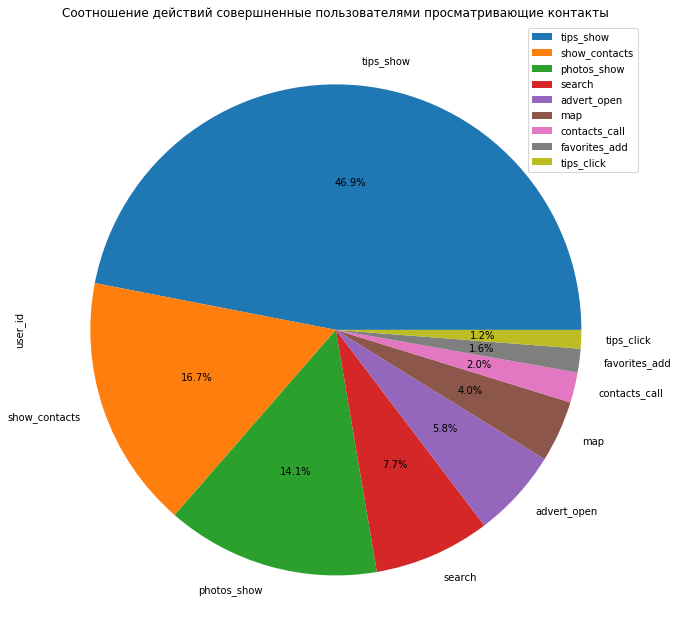

In [25]:
for_pie_show.plot(y = 'user_id', kind = 'pie',labels = for_pie_show['event_name'], autopct='%1.1f%%', figsize = (11,20))
plt.title('Соотношение действий совершненные пользователями просматривающие контакты')

Text(0.5, 1.0, 'Соотношение действий совершненные пользователями не просматривающие контакты')

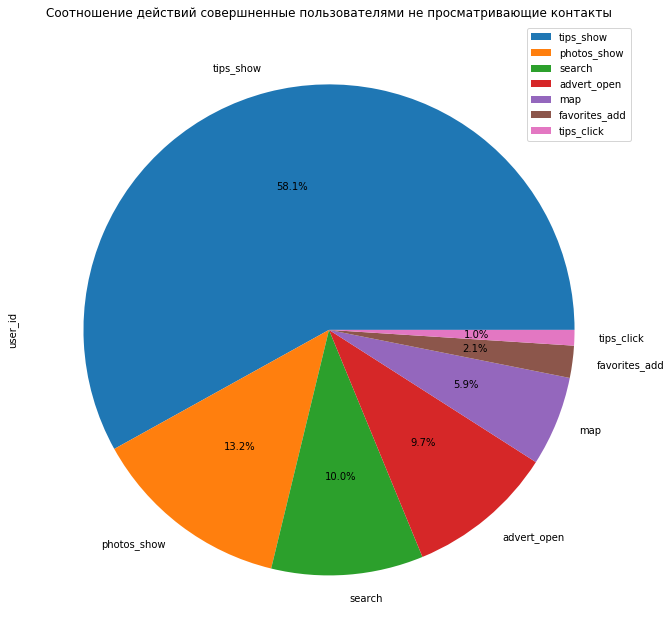

In [26]:
for_pie_not_show.plot(y = 'user_id', kind = 'pie',labels = for_pie_not_show['event_name'], autopct='%1.1f%%', figsize = (11,20))
plt.title('Соотношение действий совершненные пользователями не просматривающие контакты')

Основная разница в соотношениии действий - в группе пользователей которые не просматривали контакты на 11% больше действий - просмотр рекомендованного, по всепм остальным пунктам разница практически отсутствует 

In [27]:
print('Отношение звонков к просмотру контактов ', perc_calls_show)
print('Отношение звонков к всем действия группы', perc_calls_to_all)

Отношение звонков к просмотру контактов  11.95
Отношение звонков к всем действия группы 1.99


Только в 12 % случаев после просмотра контактов был совершен звонок продавцу, а по отношению ко все действия выделенной группы (! а даже не от всех действий всех пользователей)это действие составляет всего 2 % от общего. 

### Вывод  
Явных отличительных особенностей в действиях 2 групп - просматривающих и нет контакты пользователей не обнаружено.  ТОп действий для этих 2 групп (если опускать просмотр контактов) примерно одинаковый. Не смотря на то, что в группе пользователей которые просматривают контакты эта активность занимает 2 место по количеству (что не лпохо результат),но  последующий звонок совершается только в 12 % случаев, а само целевое действие без звонка в по моему мнению бесполезно. Считаю что данный функционал (показ контактов) в приложении не сособо необходим для пользователей.

### Статистический анализ данных    
Имеем 2 теории на проверку -   Конверсия в просмотр контактов между пользователя, совершающие действия tips_show и tips_click, другие — только tips_show - различается  (H0 - статистических различий - нет, H1 - статистические различия присутствуют)    
и Конверсия в просмотр контактов между пользователя, с источником  yandex и пользователями, с источником (H0 - статистических различий - нет, H1 - статистические различия присутствуют)  

Перед статистического анализа енобходимо выделить пользователей   
а) Пользователи совершающие действия tips_show и tips_click  
б) Пользователи совершающие только tips_show  
и  
а2) Пользователи пришедшие с источника Яндекс  
б2) Пользователи пришедшие с источника Google  

In [28]:
tips_show = 'tips_show'
tips_click = 'tips_click'
data_for_test = data.query('(event_name == @tips_show) or (event_name == @tips_click)')

In [29]:
group_for_test = data_for_test.groupby('user_id').agg({'event_name' : 'count','event_name':pd.Series.nunique}).reset_index()
group_for_test['event_name'].value_counts()

1    2529
2     297
Name: event_name, dtype: int64

Нажать на рекомендованное сообщение не увидев его - считаю не возможным, поэтому пользователи с коэф 2 - выполняли хоть раз оба этих действия. Если 1 только tips_show

In [30]:
user_list_1_move  = group_for_test.loc[group_for_test['event_name'] == 1, 'user_id'].to_list()
len(user_list_1_move)

2529

In [31]:
user_list_2_move  = group_for_test.loc[group_for_test['event_name'] == 2, 'user_id'].to_list()
len(user_list_2_move)

297

In [32]:
#data_show =  data.query('user_id in @user_list_contacts')
data_1_move = data.query('user_id in @user_list_1_move')
data_2_move = data.query('user_id in @user_list_2_move')

In [33]:
#data_1_move = data_1_move.groupby('event_name')['user_id'].count()

In [34]:
#data_1_move.columns = [['event_name','try_count_1']]
#data_1_move.columns = ['try_count_1']
#data_1_move
data_1_move_pp = (data_1_move
               .groupby(['event_name']).agg({'user_id': 'count'})
               .reset_index()
              )
data_1_move_pp

,event_name,user_id
0,advert_open,4504
1,contacts_call,1
2,favorites_add,460
3,map,3058
4,photos_show,338
5,search,2781
6,show_contacts,2020
7,tips_click,113
8,tips_show,31085


In [35]:
#data_2_move = data_2_move.groupby('event_name')['user_id'].count()
#data_2_move.columns = [['event_name','try_count_2']]
#data_2_move.columns = ['try_count_2']
#data_2_move
data_2_move_pp = (data_2_move
               .groupby(['event_name']).agg({'user_id': 'count'})
               .reset_index()
                 )
data_2_move_pp

,event_name,user_id
0,advert_open,615
1,favorites_add,155
2,map,651
3,photos_show,13
4,search,319
5,show_contacts,838
6,tips_click,701
7,tips_show,8970


In [36]:
alpha = .05
#successes = np.array([data_1_move_pp['user_id'][6], data_1_move_pp['user_id'][5]])
successes =np.array( [2020, 838])
trials = np.array([2529, 297]) #суммарное количество пользователей в каждой контрольной группе
p1 = successes[0]/trials[0]
p2 = successes[1]/trials[1]
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
difference = p1 - p2
z_value = difference / cmath.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


Получаем, что статистическиое различия между группами  пользователей, совершающие действия tips_show и tips_click, другие — только tips_show имею присутствуют(конверсия в просмотры у этих групп различается)

In [37]:
# сформируем таблицу с общим количеством пользователей по источникам
total_users = sources.groupby('source', as_index=False).count().rename(columns={'user_id':'total_users'})
total_users

,source,total_users
0,google,1129
1,other,1230
2,yandex,1934


In [38]:
goal_users = data.query('event_name=="show_contacts"').groupby(['source'], as_index=False).agg({'user_id':'nunique'}).rename(columns={'user_id':'goal_users'})
conversion_users = pd.merge(goal_users, total_users, on='source')
conversion_users

,source,goal_users,total_users
0,google,275,1129
1,other,228,1230
2,yandex,478,1934


In [39]:
purchases = np.array([275, 478])
leads = np.array([1129, 1934])

p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
p_combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
z_value = (p1 - p2) / mth.sqrt(p_combined * (1 - p_combined) * (1/leads[0] + 1/leads[1]))
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('z_value =', z_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

z_value = -0.2218487822311678
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Вывод
На основе проведенного статистического анализа можно сделать выводы :  
Разница между конверсией  между группами пользователей, совершающие действия tips_show и tips_click, другие — только tips_show имею присутствует    
Разницы между конверсией в просмотр контактов между пользователями, пришедшими из yandex, и пользователями, пришедшими из google, нет;  

# Вывод и рекомендации   
Всего приложением воспользовались 4293 пользователей  
Конверсия пользователей в просмотр контактов составляет 23%  

Явных отличительных особенностей в действиях 2 групп - просматривающих и нет контакты пользователей не было обнаружено.  Топ действий для них примерно одинаковый. Не смотря на то, что в группе пользователей которые просматривают контакты целевая активность занимает 2 место по количеству,  последующий звонок совершается только в 12 % случаев, а само целевое действие без звонка бесполезно.   
#### В процессе работыбыли проверены следующие гипотезы:  

1) Конверсия в просмотр контактов между пользователя, совершающие действия tips_show и tips_click, другие — только tips_show - не различается       
2) Конверсия в просмотр контактов между пользователя, с источником  yandex и пользователями, с источником Google не различается  
Первая гипотеза была отвергнутпа -следовательно разница в конверсии этих двух групп пользователей присутствует   
Вторая гипотеза не была отвергнута - нет оснований предпологать, что различие между конверсий этих двух групп имеется  

## Рекомендации   
Считаю что нет явной необходимости в возможном действии - показ контактов, последующих звонков по ним практически не следует.  
Предлагаю как вариант оставлять номер открытым. И провести дополнительный А/В тест на целесообразность этого действия

Ссылка на презентацию https://yadi.sk/i/vv3pc8z4FqGZIQ